多步法
$$
\sum\limits_{j=0}^k \alpha_j u_{n+j} = h \sum \limits_{j= 0}^k \beta_j f_{n+j}
$$

其中$\alpha_k \neq 0$

$\alpha_k \neq 0$

显式格式，$\beta_k = 0$: 若 $\beta_k \neq 0$，隐式格式

$$ u' = f(t,u)\quad t\in (0, 1) \quad u(0) = 1$$

右端项
$$
f(t,u) =\mu u
$$

精确解
$$
u(t) = e^{-\mu t}
$$

二级二阶隐式Runge-Kutta法

$$
\begin{aligned}
u_{n+1} &=u_{n}+\frac{h}{2}\left(k_{1}+k_{2}\right) \\
k_{1} &=f\left(t_{n}, u_{n}\right) \\
k_{2} &=f\left(t_{n}+h, u_{n}+0.5 h\left(k_{1}+k_{2}\right)\right)
\end{aligned}
$$

代入
$$
k_{2}=\mu \frac{1+0.5 \bar{h}}{1-0.5 \bar{h}} u_{n}
$$

推导可得
$$
u_{n+1} = \frac{2 + \overline{h}}{2 - \overline{h}} u_n
$$

其中
$$
\overline{h} = \mu h
$$

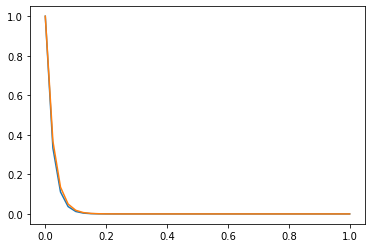

In [42]:
import numpy as np
import matplotlib.pyplot as plt

mu = -40
def f(t,u):
    return mu * t

def u_exact(t):
    return np.exp(mu * t)

# step 1
NT = 40 # 区间个数, 此为函数变量
NP = NT + 1 # 网点个数
a_left = 0
b_right = 1

h = (b_right-a_left)/NT # 步长
t = np.zeros([NP,1], dtype = float)
for n in range(NP): # 从 0 到 NT, NT+1=NP 个点
    t[n] = n * h

# step 2
uh = np.zeros([NP,1], dtype= float)
uh[0] = 1
uh[1] =  uh[0] + h * f(t[0], uh[0]) #用欧拉法给出初值

h_bar = mu * h #h_bar不可为2，即NT不可为20
for n in range(NP-2): # 从 2 到 NT
    uh[n+1] =( (2 + h_bar) / (2 - h_bar) ) * uh[n]

# step 3
u = np.zeros([NP,1], dtype = float) # 计算精确值
for n in range(NP):
    u[n] = u_exact(t[n])

# plot
plt.plot(t, uh) # 画图
plt.plot(t, u)
plt.show()

In [44]:
 def err_evl_2(NT = 10, mu = -40): #默认输入为10
    import numpy as np
    import matplotlib.pyplot as plt

    def f(t,u):
        return mu * t

    def u_exact(t):
        return np.exp(mu * t)

    # step 1
    NT = NT #  区间个数, 此为函数变量
    NP = NT + 1 # 网点个数
    a_left = 0
    b_right = 1

    h = (b_right-a_left)/NT # 步长
    t = np.zeros([NP,1], dtype = float)
    for n in range(NP): # 从 0 到 NT, NT+1=NP 个点
        t[n] = n * h

    # step 2
    uh = np.zeros([NP,1], dtype= float)
    uh[0] = 1
    uh[1] =  uh[0] + h * f(t[0], uh[0])  #用欧拉法给出初值

    h_bar = mu * h
    for n in range(NP-2): #f从2 到 NT
        uh[n+1] =( (2 + h_bar) / (2 - h_bar) ) * uh[n]
        

    # step 3
    u = np.zeros([NP,1], dtype = float) # 计算精确值
    for n in range(NP):
        u[n] = u_exact(t[n])

    # step 4
    err = np.abs(u - uh) # 计算最大误差
    err_max = max(err)

    return err_max

In [45]:
E = []
E_relative = []
T = [10, 20 ,40, 80, 160, 320]
T_relative = []
for NT in range(len(T)):
    E.append(err_evl_2( T[NT] )) # 调用上述主函数，计算不同步长下的误差

for N in range(1,len(T)):
    E_relative.append( float(E[N]/E[N-1]) ) # 计算前一个步长和后一个步长最大误差之比

for N in range(1,len(T)): 
    T_relative.append( float(T[N]/T[N-1] )) # 计算前一个步长和后一个步长之比

print(E_relative)
print(T_relative)

[0.38485903252163645, 0.25526312881549534, 0.22808477320707776, 0.24483065195842024, 0.24872488736860865]
[2.0, 2.0, 2.0, 2.0, 2.0]


### 总结

我们发现，如果我们用欧拉法给出多步法初值，误差的比值并不稳定，但大约在$\frac{1}{4}=0.25$附近摆动。